# Game: Sonar Treasure Hunt

## 1. Rules

In this game, the player drops snoar devices at various places in the ocean to locate treasure chests sunken under the sea. The sonar devices will then tell the player how far away the closest treasure chest is, but not in what direction. Hence the player needs to place mutliple sonar devices to be able to figure out the location of the treasure chest. The player has only 20 sonar devices to use to find the 3 treasure chests.

## 2. Flowchart

In [1]:
from graphviz import Digraph

In [2]:
dot = Digraph(comment='Sonar Treasure Hunt')

dot.node('START', 'START', shape='oval', style='filled', fillcolor='grey')
dot.node('Ask Display Instruction', 'Ask Display \n Instruction')
dot.node('Display Instructions', 'Display \n Instructions')
dot.node('Generate Random Chests', 'Generate \n Random Chests')
dot.node('Display Board', 'Display Board')
dot.node('Check if run out of Sonar Devices', 'Check if run out \n of Sonar Devices')

player_loses = Digraph('Player loses', node_attr={'shape': 'doublecircle', 'color': 'red', 'style': 'filled', 'fillcolor': 'white'})
player_loses.node('Lose','Lose')
dot.subgraph(player_loses)

dot.node('Ask for Move', 'Ask for Move')
dot.node('Check Chest found', 'Check Chest found')
dot.node("Refresh Sonars's Insights with Next Closest Chest","Refresh Sonars's \n Insights with Next \n Closest Chest")
dot.node('All Chests found?', 'All Chests found?')

player_wins = Digraph('Player wins', node_attr={'shape': 'doublecircle', 'color': 'green', 'style': 'filled', 'fillcolor': 'white'})
player_wins.node('Win','Win')
dot.subgraph(player_wins)

dot.node('Decrement Sonar Devices Count', 'Decrement Sonar \n Devices Count')

dot.node('Play Again?', 'Play Again?')
dot.node('END', 'END', shape='oval', style='filled', fillcolor='grey')

In [3]:
dot.edge('START', 'Ask Display Instruction')
dot.edge('Ask Display Instruction', 'Display Instructions', label='Yes')
dot.edge('Display Instructions', 'Generate Random Chests')
dot.edge('Ask Display Instruction', 'Generate Random Chests', label='No')
dot.edge('Generate Random Chests', 'Check if run out of Sonar Devices')

dot.edge('Check if run out of Sonar Devices', 'Lose', label='SonarDevices == 0')
dot.edge("Lose", 'Play Again?')

dot.edge('Check if run out of Sonar Devices','Display Board', label='SonarDevices > 0')
dot.edge('Display Board','Ask for Move')
dot.edge('Ask for Move', 'Check Chest found')

dot.edge('Check Chest found', "Refresh Sonars's Insights with Next Closest Chest", label='One Chest found: \n Chests-=1')
dot.edge("Refresh Sonars's Insights with Next Closest Chest", 'All Chests found?')
dot.edge('All Chests found?', 'Win', label='Chests==0')
dot.edge("Win", 'Play Again?')
dot.edge('All Chests found?', 'Decrement Sonar Devices Count', label='Chests>0')

dot.edge('Check Chest found', 'Decrement Sonar Devices Count', label='No Chest found: \n Chests-=0')
dot.edge('Decrement Sonar Devices Count', 'Check if run out of Sonar Devices')   
    
dot.edge('Play Again?', "Generate Random Chests", label='Yes')
dot.edge('Play Again?', 'END', label='No')

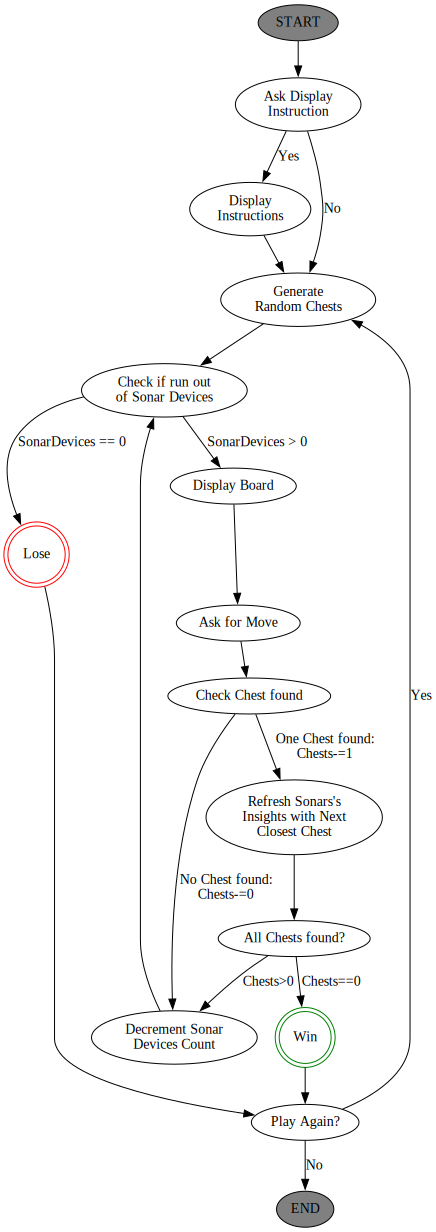

In [4]:
dot

## 3. Program

In [5]:
import random
import sys
# sys containst the sys.exit() function => it terminates the program immediately and none of the lines of code after the sys.exit() call will run.
import math
# math contains the math.sqrt() function => square root

In [6]:
# Function creates a new 60x15 board data structure.
def getNewBoard():
    board = []
    # The main list is a list of 60 lists.
    for x in range(60): 
        board.append([])
        # Each list in the main list has 15 single-character strings.
        for y in range(15): 
            # Use different characters for the ocean to make it more readable.
            if random.randint(0, 1) == 0:
                board[x].append('~')
            else:
                board[x].append('-')
    return board

In [7]:
# Function draws the board data structure.
def drawBoard(board):
    
    # Step 1: Create a string variable that marks the coordinates for 10, 20, 30, 40, 50 on the x-axis.
    tensDigitsLine = '    ' # Initial space for the numbers down the left side of the board.
    for i in range(1, 6):
        tensDigitsLine += (' ' * 9) + str(i)

    # Step 2: Print the numbers across the top of the board.
    print(tensDigitsLine)
    print('   ' + ('0123456789' * 6))
    print()

    # Step 3: Print each of the 15 rows to draw the ocean.
    for row in range(15):
        # Single-digit numbers need to be padded with an extra space.
        if row < 10:
            extraSpace = ' '
        else:
            extraSpace = ''

        # Create the string for this row on the board.
        boardRow = ''
        for column in range(60):
            boardRow += board[column][row]

        print('%s%s %s %s' % (extraSpace, row, boardRow, row))

    # Step 4: Print the numbers across the bottom of the board.
    print()
    print('   ' + ('0123456789' * 6))
    print(tensDigitsLine)

In [8]:
# Function creates a list of chest data structures (two-item lists of x, y int coordinates).
def getRandomChests(numChests):
    chests = []
    while len(chests) < numChests:
        newChest = [random.randint(0, 59), random.randint(0, 14)]
        # Make sure a chest is not already here.
        if newChest not in chests: 
            chests.append(newChest)
    return chests

In [9]:
# Function determines whethe a move is valid by returning True only if the coordinates are on the board.
def isOnBoard(x, y):
    return x >= 0 and x <= 59 and y >= 0 and y <= 14

In [10]:
# Function lets the player enter its moves. Return a two-item list of int xy coordinates.
def enterPlayerMove(previousMoves):
    print('Where do you want to drop the next sonar device? (0-59 0-14) (or type quit)')
    while True:
        move = input()
        if move.lower() == 'quit':
            print('Thanks for playing!')
            sys.exit()

        move = move.split()
        if len(move) == 2 and move[0].isdigit() and move[1].isdigit() and isOnBoard(int(move[0]), int(move[1])):
            if [int(move[0]), int(move[1])] in previousMoves:
                print('You already moved there.')
                continue
            return [int(move[0]), int(move[1])]

        print('Enter a number from 0 to 59, a space, then a number from 0 to 14.')

In [11]:
# Function places a move on the board
# Function uses 4 parameters: Board's datastructure, treasure chests' datastructure, x-coordinates and y coordinates.
# Return False if this is an invalid move.
def makeMove(board, chests, x, y):
    
    smallestDistance = 100 # Any chest will be closer than 100.
    for cx, cy in chests:
        distance = math.sqrt((cx - x) * (cx - x) + (cy - y) * (cy - y))
        
        if distance < smallestDistance: # We want the closest treasure chest.
            smallestDistance = distance

    smallestDistance = round(smallestDistance)
    
    # Outcome 1: xy is directly on a treasure chest
    if smallestDistance == 0:
        # Removes each treasure chest from the chests list as they are found.
        chests.remove([x, y])
        # Returns the string of the result of this move.
        return 'You have found a sunken treasure chest!'
    else:
        # Outcome 2: xy is within a distance of 9 or less of a chest
        if smallestDistance < 10:\
            # Changes the board data structure with the Smallest Distance to a chest as the sonar device character.
            board[x][y] = str(smallestDistance)
            # Returns the string of the result of this move.
            return 'Treasure detected at a distance of %s from the sonar device.' % (smallestDistance)
        # Outcome 3: xy is within a distance of more than 9 of a chest
        else:
            # Changes the board data structure with a null sonar device character.
            board[x][y] = 'X'
            # Returns the string of the result of this move.
            return 'Sonar did not detect anything. All treasure chests out of range.'

In [12]:
def showInstructions():
    print('''Instructions:
You are the captain of the Simon, a treasure-hunting ship. Your current mission
is to use sonar devices to find three sunken treasure chests at the bottom of
the ocean. But you only have cheap sonar that finds distance, not direction.

Enter the coordinates to drop a sonar device. The ocean map will be marked with
how far away the nearest chest is, or an X if it is beyond the sonar device's
range. For example, the C marks are where chests are. The sonar device shows a
3 because the closest chest is 3 spaces away.

(In the real game, the chests are not visible in the ocean.)

Press enter to continue...''')
    input()

    print('''When you drop a sonar device directly on a chest, you retrieve it and the other
sonar devices update to show how far away the next nearest chest is. The chests
are beyond the range of the sonar device on the left, so it shows an X.

The treasure chests don't move around. Sonar devices can detect treasure chests
up to a distance of 9 spaces. Try to collect all 3 chests before running out of
sonar devices. Good luck!

Press enter to continue...''')
    input()

In [13]:
print('S O N A R !')
print()
print('Would you like to view the instructions? (yes/no)')
if input().lower().startswith('y'):
    showInstructions()

while True:
    # Game setup
    sonarDevices = 20
    theBoard = getNewBoard()
    theChests = getRandomChests(3)
    drawBoard(theBoard)
    previousMoves = []

    while sonarDevices > 0:
        # Show sonar device and chest statuses.
        print('You have %s sonar device(s) left. %s treasure chest(s) remaining.' % (sonarDevices, len(theChests)))

        x, y = enterPlayerMove(previousMoves)
        # We must track all moves so that sonar devices can be updated.
        previousMoves.append([x, y]) 

        moveResult = makeMove(theBoard, theChests, x, y)
        if moveResult == False:
            continue
        else:
            if moveResult == 'You have found a sunken treasure chest!':
                # Update all the sonar devices currently on the map.
                for x, y in previousMoves:
                    makeMove(theBoard, theChests, x, y)
            drawBoard(theBoard)
            print(moveResult)

        if len(theChests) == 0:
            print('You have found all the sunken treasure chests! Congratulations and good game!')
            break

        sonarDevices -= 1

    if sonarDevices == 0:
        print('We\'ve run out of sonar devices! Now we have to turn the ship around and head')
        print('for home with treasure chests still out there! Game over.')
        print(' The remaining chests were here:')
        for x, y in theChests:
            print(' %s, %s' % (x, y))

    print('Do you want to play again? (yes or no)')
    if not input().lower().startswith('y'):
        sys.exit()

S O N A R !

Would you like to view the instructions? (yes/no)


 yes


Instructions:
You are the captain of the Simon, a treasure-hunting ship. Your current mission
is to use sonar devices to find three sunken treasure chests at the bottom of
the ocean. But you only have cheap sonar that finds distance, not direction.

Enter the coordinates to drop a sonar device. The ocean map will be marked with
how far away the nearest chest is, or an X if it is beyond the sonar device's
range. For example, the C marks are where chests are. The sonar device shows a
3 because the closest chest is 3 spaces away.

(In the real game, the chests are not visible in the ocean.)

Press enter to continue...


When you drop a sonar device directly on a chest, you retrieve it and the other
sonar devices update to show how far away the next nearest chest is. The chests
are beyond the range of the sonar device on the left, so it shows an X.

The treasure chests don't move around. Sonar devices can detect treasure chests
up to a distance of 9 spaces. Try to collect all 3 chests before running out of
sonar devices. Good luck!

Press enter to continue...


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~~~~-----~---~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--~-~-~~~-~-~~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~--~~~~~-~-----~~~~-~~-~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 10 3


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~---~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--~-~-~~~-~-~~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~--~~~~~-~-----~~~~-~~-~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 10 8


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~---~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-~~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~--~~~~~-~-----~~~~-~~-~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 10 12


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~---~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-~~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~-----~~~~-~~-~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 20 3


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-~~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~-----~~~~-~~-~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 20 8


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-5~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~-----~~~~-~~-~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 20 12


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-5~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~--1--~~~~-~~-~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 30 12


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-5~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~--1--~~~~-~~9~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 21 12


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-5~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~---~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~--11-~~~~-~~9~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 20 11


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-5~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--2~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~--11-~~~~-~~9~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 20 13


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-5~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--2~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~--11-~~~~-~~9~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 21 13


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-9~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--7~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~--78-~~~~-~~X~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 10 14


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-9~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--7~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~--78-~~~~-~~X~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-~

 15 13


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--6-~-~~~-~-9~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--7~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-3~~~~~-~--78-~~~~-~~X~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~~-2

 13 13


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~--~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--X-~-~~~-~-X~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--X~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-X~~~~~-~--XX-~~~~-~~X~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~X-X

 40 3


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~X-~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--X-~-~~~-~-X~-~~--~~-~~-~~-~~---~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--X~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-X~~~~~-~--XX-~~~~-~~X~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~X-X

 40 8


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~X-~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--X-~-~~~-~-X~-~~--~~-~~-~~-~~--X~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--X~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-X~~~~~-~--XX-~~~~-~~X~~~~-~~-----~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~X-X

 40 12


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~X-~~--~~~-~~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--X-~-~~~-~-X~-~~--~~-~~-~~-~~--X~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--X~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-X~~~~~-~--XX-~~~~-~~X~~~~-~~--X--~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~X-X

 50 3


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~X-~~--~~~-5~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--X-~-~~~-~-X~-~~--~~-~~-~~-~~--X~----~----~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--X~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-X~~~~~-~--XX-~~~~-~~X~~~~-~~--X--~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~X-X

 50 8


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~X-~~--~~~-5~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~----~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--X-~-~~~-~-X~-~~--~~-~~-~~-~~--X~----~---4~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--X~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-X~~~~~-~--XX-~~~~-~~X~~~~-~~--X--~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~X-X

 50 5


             1         2         3         4         5
   012345678901234567890123456789012345678901234567890123456789

 0 ~~-~---~--~~~~~~----~-~~-~-~~~-~~-~--~--~~~~~--~~-----~~-~~~ 0
 1 --~--~~~~-~~~~--~~----~~--~-~~~~~~---~-~-~~-~----~~-~~~~~--~ 1
 2 ~~-~-~~~--~~--~~~-~~~--~~~-~~~~~-~~---~~~-------~~-~---~-~~- 2
 3 ~-~-~~~~-~X~~-----~-X-~~~~----~-~----~~~X-~~--~~~-5~~~~--~-~ 3
 4 ---~-~~~-~--~~--~~--~-~-~~-----~-~--~-----~~---~-~----~~-~~~ 4
 5 -~~~-~~--~~~--~~~~-~~~-~~~~----~-----~-~-~----~-~-4--~~~~-~- 5
 6 --~~~---~~--~~~~-~~-~--~----~~~-----~----~~-~~--~--~~~-~~-~~ 6
 7 ~----~-~~~-~---~-~---~---~~~---~~~--~-~~~-~~-~-~-~~~--~--~-~ 7
 8 ~~-~~~-~--X-~-~~~-~-X~-~~--~~-~~-~~-~~--X~----~---4~----~~~~ 8
 9 -~--~-~-~~---~-~-~~~-~-~----~-~---~-~~-~-~~-~-~~~--~--~-~-~~ 9
10 ----~-~-~--~~~-~-~~-~~-~~~-~-~-~-~~~~-~---~---~~---~~---~~~~ 10
11 --~~~~-~~~--~~~--~--X~---~~~-~--~-~~-~~~~-~~-~---~---~~-~~-~ 11
12 ~~--~~--~-X~~~~~-~--XX-~~~~-~~X~~~~-~~--X--~-~-~-~-~~----~~- 12
13 ~~~--~~-~~-~~X-X

 no


SystemExit: 

C:\Users\pauly\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
